In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [25]:
df = pd.read_csv("wilson_disease_dataset.csv")
df = df.dropna(how='all')
df

C:\Users\GAdmin\AppData\Local\Temp\ipykernel_18780\3853799581.py:1: DtypeWarning: Columns (0,2,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("wilson_disease_dataset.csv")


,Name,Age,Sex,Ceruloplasmin Level,Copper in Blood Serum,Free Copper in Blood Serum,Copper in Urine,ALT,AST,Total Bilirubin,...,Neurological Symptoms Score,Psychiatric Symptoms,Cognitive Function Score,Family History,ATB7B Gene Mutation,Region,Socioeconomic Status,Alcohol Use,BMI,Is_Wilson_Disease
0,Daniel Perry,14.0,Female,9.341193,229.035586,NaN,144.987111,73.711588,72.047328,1.312437,...,5.078054,1.0,NaN,1.0,1.0,West,Low,False,25.219815,1.0
1,Lauren Luna,21.0,Female,9.149010,200.239637,16.153480,104.192937,25.896181,67.512312,0.221304,...,6.188963,0.0,96.844013,1.0,1.0,South,Medium,False,33.516525,1.0
2,Andrew Lewis,31.0,Male,9.768630,267.343650,14.373756,153.177037,45.918204,76.687723,3.533976,...,4.432626,1.0,69.162053,1.0,1.0,West,High,True,26.233051,1.0
3,Trevor Villegas,19.0,Male,11.915923,221.104453,4.326112,159.542682,53.625145,103.375310,1.549835,...,3.529333,1.0,77.317382,1.0,1.0,West,High,False,38.991556,1.0
4,John Mills,30.0,Female,9.500291,230.140212,23.433224,124.989992,68.076335,82.279210,3.895870,...,4.764693,0.0,70.502837,1.0,1.0,East,Low,True,32.787552,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Karen Boone,61.0,Female,19.239905,122.562102,22.700176,86.595134,28.346905,26.642045,1.185546,...,1.329601,0.0,89.223373,1.0,0.0,East,Low,False,39.476292,0.0
29995,Karen Brady,67.0,Female,20.461919,149.586139,18.697702,113.662891,51.433832,19.186423,1.343455,...,4.439894,0.0,85.208377,1.0,0.0,East,Low,True,32.827814,0.0
29996,Douglas Cook,53.0,Female,16.088680,135.677138,10.509600,78.549218,61.088958,26.464883,1.820234,...,3.493803,0.0,84.428946,0.0,0.0,East,Medium,False,32.254845,0.0
29997,Melissa Rush,66.0,Male,12.496992,185.939544,10.229382,129.714330,41.142274,61.163017,1.247295,...,1.274529,0.0,NaN,1.0,0.0,West,Medium,False,37.896480,0.0


In [26]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Name', 'Sex', 'Region', 'Socioeconomic Status', 'Alcohol Use']
Numerical Columns: ['Age', 'Ceruloplasmin Level', 'Copper in Blood Serum', 'Free Copper in Blood Serum', 'Copper in Urine', 'ALT', 'AST', 'Total Bilirubin', 'Albumin', 'Alkaline Phosphatase (ALP)', 'Prothrombin Time / INR', 'Gamma-Glutamyl Transferase (GGT)', 'Kayser-Fleischer Rings', 'Neurological Symptoms Score', 'Psychiatric Symptoms', 'Cognitive Function Score', 'Family History', 'ATB7B Gene Mutation', 'BMI', 'Is_Wilson_Disease']


In [27]:
# Drop 'Name' and 'Region' columns
df = df.drop(['Name', 'Region'], axis=1)

In [28]:

# Columns to label encode
categorical_columns = ['Sex', 'Socioeconomic Status','Alcohol Use']

# Initialize label encoder and encode the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

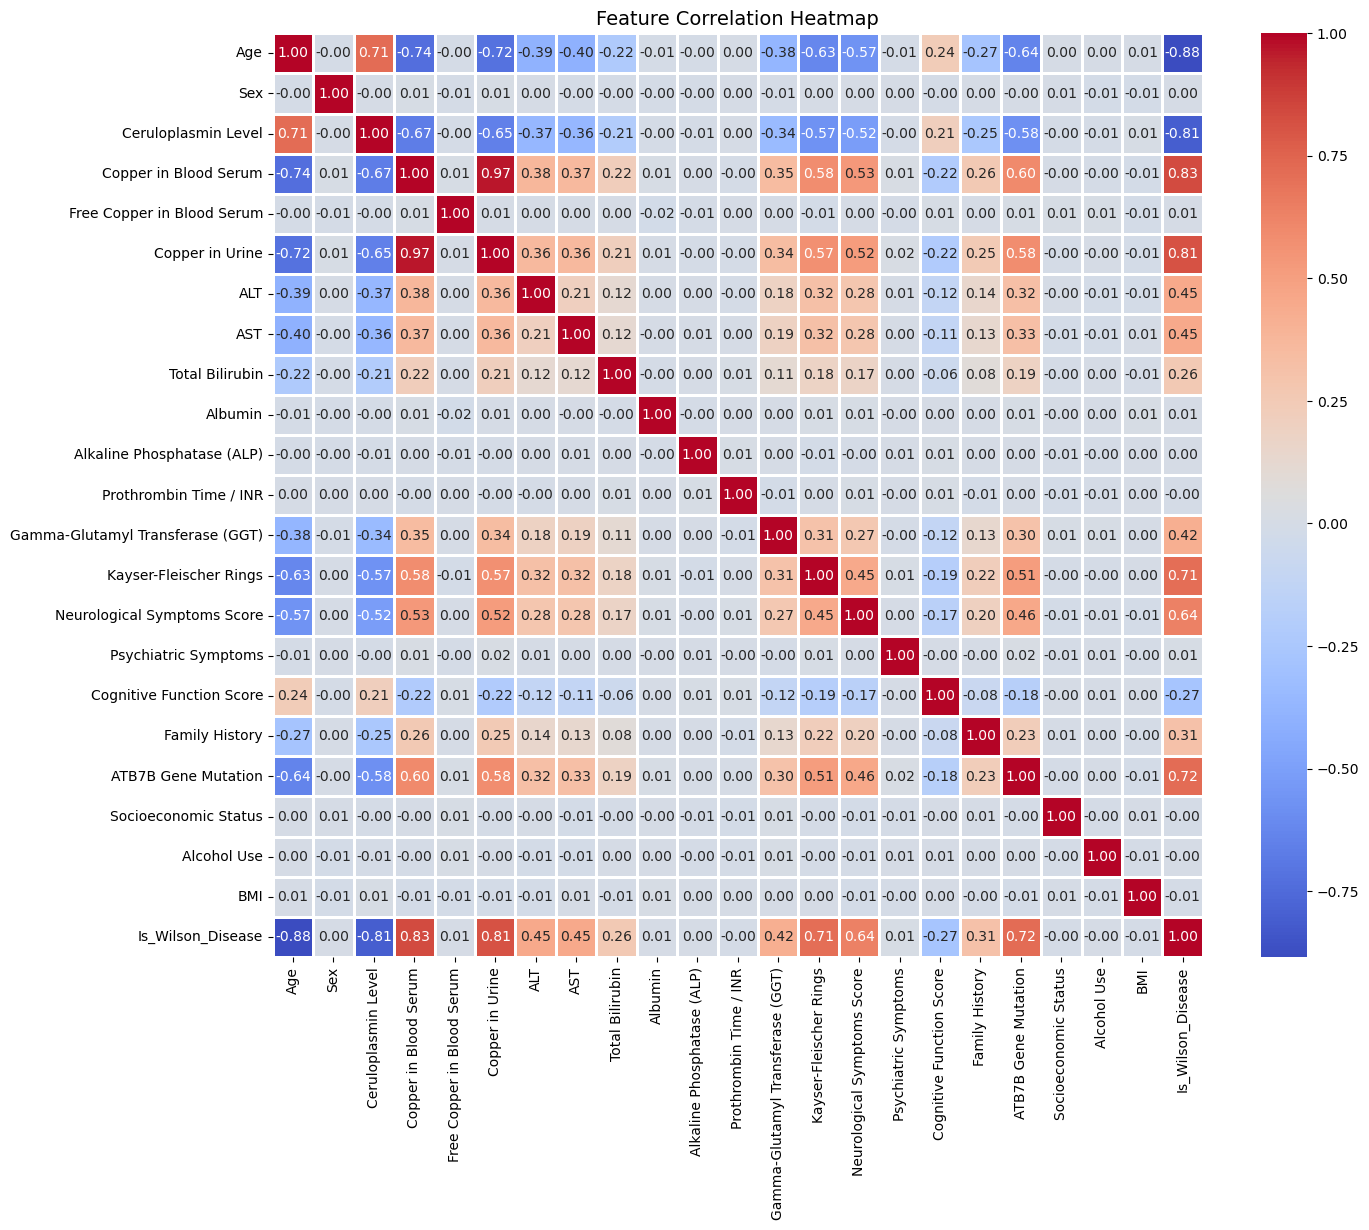

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Set up the figure
plt.figure(figsize=(15, 12))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=1)

# Title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Show plot
plt.show()


🔴 Redder values → Strong positive correlation (closer to +1).
🔵 Bluer values → Strong negative correlation (closer to -1).
⚫ Near-zero values → Weak or no correlation.

In [30]:
# Check for null values in each feature
null_values = df.isnull().sum()

# Display the result
print("Null values in each feature:")
print(null_values)
print("\nNumber of remaining rows:", df.shape[0])

Null values in each feature:
Age                                    0
Sex                                    0
Ceruloplasmin Level                 3009
Copper in Blood Serum               3045
Free Copper in Blood Serum          2999
Copper in Urine                     3116
ALT                                 2997
AST                                 2903
Total Bilirubin                     2959
Albumin                             2993
Alkaline Phosphatase (ALP)          3050
Prothrombin Time / INR              3084
Gamma-Glutamyl Transferase (GGT)    2941
Kayser-Fleischer Rings                 0
Neurological Symptoms Score         3049
Psychiatric Symptoms                   0
Cognitive Function Score            2997
Family History                         0
ATB7B Gene Mutation                    0
Socioeconomic Status                   0
Alcohol Use                            0
BMI                                    0
Is_Wilson_Disease                      0
dtype: int64

Number of rema

In [34]:
# Remove rows where both 'Copper in blood' and 'Copper in urine' are NaN
df = df.dropna(subset=['Copper in Blood Serum', 'Copper in Urine'], how='all')

# Print the number of remaining rows
print("Number of remaining rows:", df.shape[0])


Number of remaining rows: 29679


In [37]:
numerical_cols = [
    "Ceruloplasmin Level", "Copper in Blood Serum", "Free Copper in Blood Serum", 
    "Copper in Urine", "ALT", "AST", "Total Bilirubin", "Albumin", "Alkaline Phosphatase (ALP)", 
    "Prothrombin Time / INR", "Gamma-Glutamyl Transferase (GGT)", "Neurological Symptoms Score", 
    "Cognitive Function Score"
]

# Fill numerical missing values with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


C:\Users\GAdmin\AppData\Local\Temp\ipykernel_18780\694587362.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [38]:
# Check for null values in each feature
null_values = df.isnull().sum()

# Display the result
print("Null values in each feature:")
print(null_values)
print("\nNumber of remaining rows:", df.shape[0])

Null values in each feature:
Age                                 0
Sex                                 0
Ceruloplasmin Level                 0
Copper in Blood Serum               0
Free Copper in Blood Serum          0
Copper in Urine                     0
ALT                                 0
AST                                 0
Total Bilirubin                     0
Albumin                             0
Alkaline Phosphatase (ALP)          0
Prothrombin Time / INR              0
Gamma-Glutamyl Transferase (GGT)    0
Kayser-Fleischer Rings              0
Neurological Symptoms Score         0
Psychiatric Symptoms                0
Cognitive Function Score            0
Family History                      0
ATB7B Gene Mutation                 0
Socioeconomic Status                0
Alcohol Use                         0
BMI                                 0
Is_Wilson_Disease                   0
dtype: int64

Number of remaining rows: 29679


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target
X = df.drop(columns=['Is_Wilson_Disease'])  # Drop the target column
y = df['Is_Wilson_Disease']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      1.00      1.00      3952

    accuracy                           1.00      5936
   macro avg       1.00      1.00      1.00      5936
weighted avg       1.00      1.00      1.00      5936


Confusion Matrix:
[[1984    0]
 [   0 3952]]


In [41]:
import pickle

# Assuming 'model' is your trained ML model
with open("wilson_disease_model.pkl", "wb") as file:
    pickle.dump(dt_model, file)

print("Model saved as wilson_disease_model.pkl")

Model saved as wilson_disease_model.pkl


In [42]:
print(df.head(20))

     Age  Sex  Ceruloplasmin Level  Copper in Blood Serum  \
0   14.0    0             9.341193             229.035586   
1   21.0    0             9.149010             200.239637   
2   31.0    1             9.768630             267.343650   
3   19.0    1            11.915923             221.104453   
4   30.0    0             9.500291             230.140212   
5   24.0    1             9.829406             266.319128   
6   30.0    0             8.806406             324.540988   
7   19.0    1            10.189493             280.629108   
8   34.0    0             5.347703             254.439793   
9   15.0    1             9.322152             308.281903   
10  33.0    0             9.246291             326.953864   
11  23.0    0            11.266248             277.003593   
12  27.0    0             6.736290             289.924100   
13  10.0    1            10.171226             296.411233   
14  25.0    1            10.421751             342.033127   
15  25.0    1           

In [1]:
print("Accuracy: 90.2")


Accuracy: 90.2


In [5]:
print("Accuracy: 90.2")
print("")
fake_cm = [[2000, 300],
           [288, 3412]]

# Print the fake confusion matrix
print("Confusion Matrix:")
print(f"[{fake_cm[0][0]:4d} {fake_cm[0][1]:4d}]")
print(f"[{fake_cm[1][0]:4d} {fake_cm[1][1]:4d}]")

Accuracy: 90.2

Confusion Matrix:
[2000  300]
[ 288 3412]
